<a href="https://colab.research.google.com/github/umeshrawat/AI_Math_Vedas/blob/master/Intro_to_Neural_Networks_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PERCEPTRON

Building a simple Perceptron to fit a OR, AND and XOR Gate


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
import pandas as pd
plt.style.use("fivethirtyeight")

Define the class for Perceptron

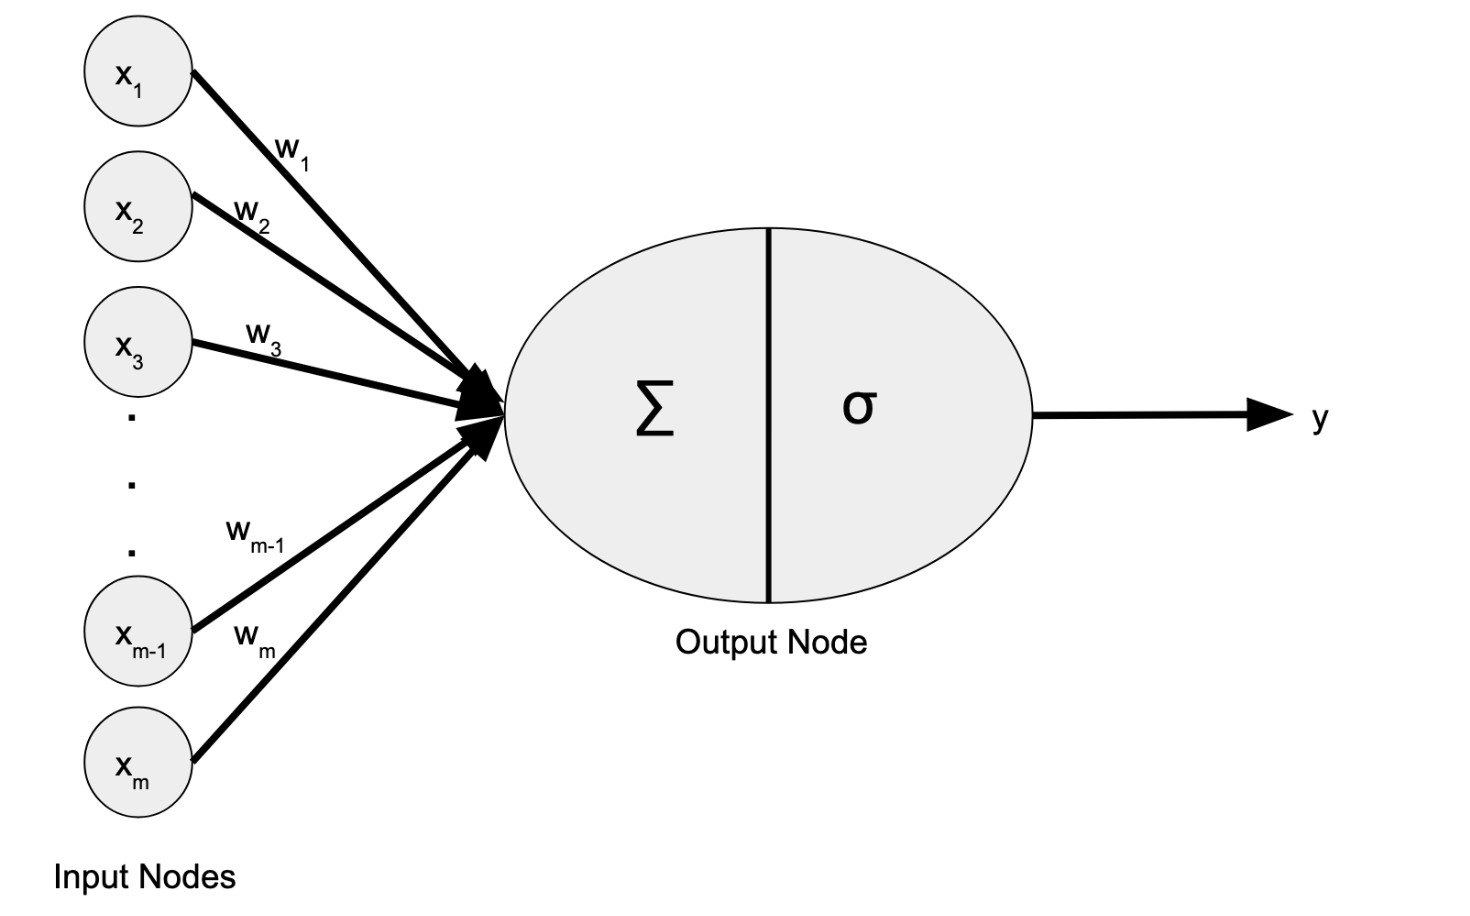


In [ ]:
class Perceptron:
  def __init__(self, eta, epochs):
    self.weights = np.random.randn(3) * 1e-4
    print(f"self.weights: {self.weights}")
    self.eta = eta
    self.epochs = epochs

  def activationFunction(self, inputs, weights): # binary activation function
    z = np.dot(inputs, weights) # [3, -4, 1] -> sigma([3, -4, 1]) = [1, 0, 1]
    return np.where(z > 0 , 1, 0) # sigma

  def fit(self, X, y):
    self.X = X
    self.y = y

    X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))] # concactination
    print(f"X_with_bias: \n{X_with_bias}")

    for epoch in range(self.epochs):
      print(f"for epoch: {epoch}")
      y_hat = self.activationFunction(X_with_bias, self.weights) # forward pass
      print(f"predicted value: \n{y_hat}")
      error = self.y - y_hat # "comparison"
      print(f"error: \n{error}")
      self.weights = self.weights + self.eta * np.dot(X_with_bias.T, error) # "backwards pass"
      print(f"updated weights: \n{self.weights}")
      print("#############\n")

  def predict(self, X):
    X_with_bias = np.c_[X, -np.ones((len(self.X), 1))]
    return self.activationFunction(X_with_bias, self.weights)


Quick Summary on AND, OR, XOR Operations: [AND, OR, XOR Bitwise Operations](https://krissparks.medium.com/and-or-xor-bitwise-operators-2ae3fbcfa5bc)

# AND Operation:

Creating the Dataframe for AND Operation

In [ ]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,0,0,1]}

AND = pd.DataFrame(data)
AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [ ]:
X = AND.drop("y", axis=1)
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [ ]:
y = AND['y']
y.to_frame()

,y
0,0
1,0
2,0
3,1


In [ ]:
model = Perceptron(eta = 0.5, epochs=10)
model.fit(X,y)

self.weights: [-2.51422455e-05  1.89749831e-04  3.74500938e-05]
X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch: 0
predicted value: 
[0 1 0 1]
error: 
0    0
1   -1
2    0
3    0
Name: y, dtype: int64
updated weights: 
[-2.51422455e-05 -4.99810250e-01  5.00037450e-01]
#############

for epoch: 1
predicted value: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights: 
[4.99974858e-01 1.89749831e-04 3.74500938e-05]
#############

for epoch: 2
predicted value: 
[0 1 1 1]
error: 
0    0
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights: 
[-2.51422455e-05 -4.99810250e-01  1.00003745e+00]
#############

for epoch: 3
predicted value: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights: 
[4.99974858e-01 1.89749831e-04 5.00037450e-01]
#############

for epoch: 4
predicted value: 
[0 0 0 1]
error: 
0    0
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[4.99974858e-01 1.8974

In [ ]:
# weights = np.random.randn(3) * 1e-4
# X_with_bias = np.c_[X, -np.ones((len(X), 1))]
# X_with_bias


In [ ]:
# z = np.dot(X_with_bias, weights)
# # np.where(z > 0 , 1, 0)

Simple Perceptron Successfully fits the AND Gate

In [ ]:
model.predict(X)

array([0, 0, 0, 1])

In [ ]:
model.weights

array([4.99974858e-01, 1.89749831e-04, 5.00037450e-01])

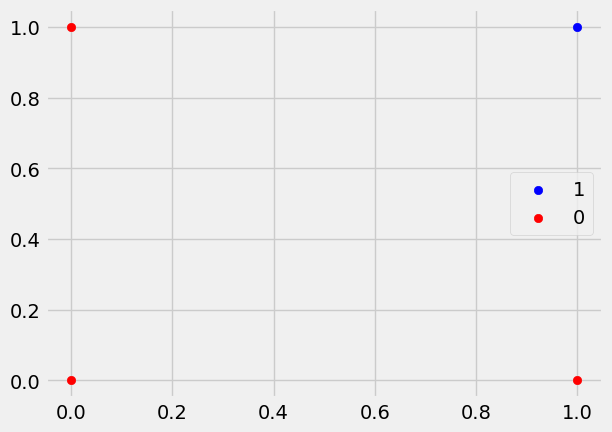

In [ ]:
X_and = np.array([[0,0],[0,1],[1,0],[1,1]])

y_and = y.values

plt.scatter(X_and[y_and == 1,0],X_and[y_and == 1,1], c = 'b', label = "1")
plt.scatter(X_and[y_and == 0,0],X_and[y_and == 0,1], c = 'r', label = "0")

plt.legend()

plt.show()

Can you find the decision boundary? What do you notice?

# OR Operation:

Creating the Dataframe to fit the OR Operation

In [ ]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,1,1,1]}

OR = pd.DataFrame(data)
OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [ ]:
X = OR.drop("y", axis=1)
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [ ]:
y = OR['y']
y.to_frame()

,y
0,0
1,1
2,1
3,1


In [ ]:
model = Perceptron(eta = 0.5, epochs=10)
model.fit(X,y)

self.weights: [ 1.25926242e-04 -1.12396324e-04 -4.35967252e-05]
X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch: 0
predicted value: 
[1 0 1 1]
error: 
0   -1
1    1
2    0
3    0
Name: y, dtype: int64
updated weights: 
[ 1.25926242e-04  4.99887604e-01 -4.35967252e-05]
#############

for epoch: 1
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[1.25926242e-04 4.99887604e-01 4.99956403e-01]
#############

for epoch: 2
predicted value: 
[0 0 0 1]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights: 
[ 0.50012593  0.9998876  -0.5000436 ]
#############

for epoch: 3
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[ 5.00125926e-01  9.99887604e-01 -4.35967252e-05]
#############

for epoch: 4
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[0.50012593 0.9998876  0.499956

Perceptron fits the OR Gate because of linearity

## Look at this visually

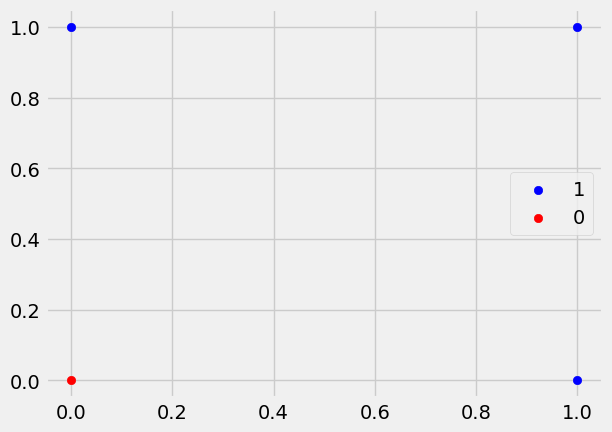

In [ ]:
X_or = np.array([[0,0],[0,1],[1,0],[1,1]])

y_or = y.values

plt.scatter(X_or[y_or == 1,0],X_or[y_or == 1,1], c = 'b', label = "1")
plt.scatter(X_or[y_or == 0,0],X_or[y_or == 0,1], c = 'r', label = "0")

plt.legend()

plt.show()

Can you find the decision boundary? What do you notice?

# XOR Operation:

Creating the Dataframe for fitting the XOR Operation

In [ ]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,1,1,0]}

XOR = pd.DataFrame(data)
XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [ ]:
X = XOR.drop("y", axis=1) # axis = 1 >>> dropping accross column
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [ ]:
y = XOR['y']
y.to_frame()

,y
0,0
1,1
2,1
3,0


In [ ]:
model = Perceptron(eta = 0.5, epochs=50)
model.fit(X,y)

self.weights: [-7.91085898e-05  8.08897987e-05  7.65868093e-05]
X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
for epoch: 0
predicted value: 
[0 1 0 0]
error: 
0    0
1    0
2    1
3    0
Name: y, dtype: int64
updated weights: 
[ 4.99920891e-01  8.08897987e-05 -4.99923413e-01]
#############

for epoch: 1
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights: 
[-7.91085898e-05 -4.99919110e-01  5.00076587e-01]
#############

for epoch: 2
predicted value: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights: 
[ 4.99920891e-01  8.08897987e-05 -4.99923413e-01]
#############

for epoch: 3
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights: 
[-7.91085898e-05 -4.99919110e-01  5.00076587e-01]
#############

for epoch: 4
predicted value: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights: 
[ 4.99920891e-01

In [ ]:
model.predict(X)

array([0, 0, 0, 0])

## Look at this visually

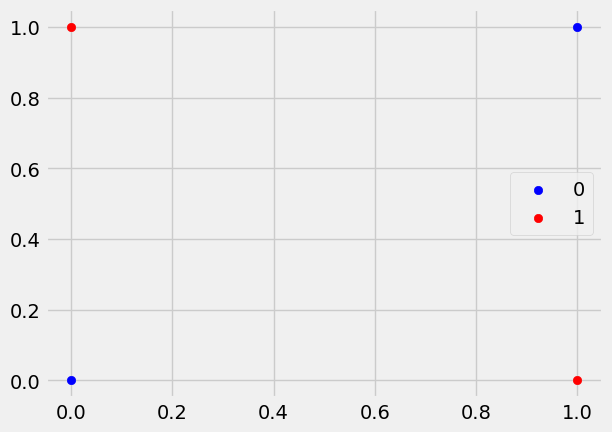

In [ ]:
X_xor = np.array([[0,0],[0,1],[1,0],[1,1]])

y_xor = np.array([0,1,1,0])

plt.scatter(X_xor[y_xor == 0,0],X_xor[y_xor == 0,1], c = 'b', label = "0")
plt.scatter(X_xor[y_xor == 1,0],X_xor[y_xor == 1,1], c = 'r', label = "1")

plt.legend()

plt.show()

# Conclusion:
Here we can see Perceptron can only classify the linear problem like AND, OR operation because they were linear problem. But in the case of XOR it couldn't classify correctly because it was a non-linear problem. Lets see graphically.

Would an MLP do better? let's see.The official documentation on sklearn is https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [ ]:
# use scikit learn to work with MLPs
# import MLPClassifier
from sklearn.neural_network import MLPClassifier

## Fit an MLPClassifier on these data,
## can it separate them?
mlp = MLPClassifier(hidden_layer_sizes=(25,) # 1 hidden layer with 25 neurons
                    ,activation='relu'
                    ,solver='adam'
                    ,max_iter=10000)

mlp.fit(X_xor,y_xor)

pred = mlp.predict(X_xor)

print("prediction",pred)
print(sum(pred==y_xor)/len(y_xor))

prediction [0 1 1 0]
1.0


In [ ]:
pred

array([0, 1, 1, 0])

# Activation Functions

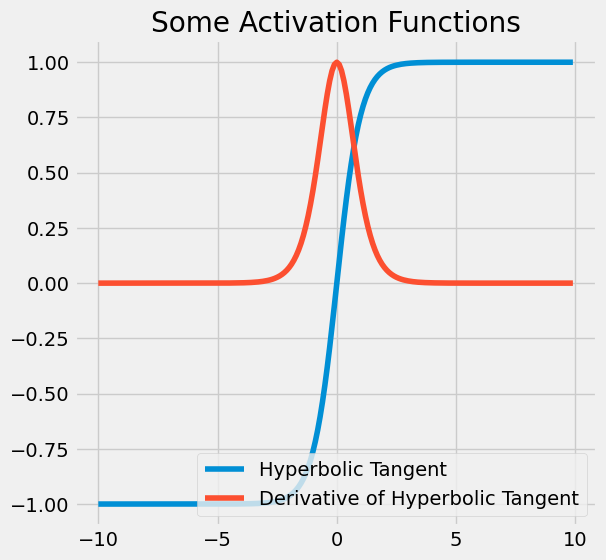

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

def dx_sigmoid(x):
    return np.exp(-x)/(1+np.exp(-x))**2

def relu(x):
    return np.where(x>=0, x, 0)

def dx_relu(x):
    return np.where(x>0, 1, 0)

plt.figure(figsize=(6, 6))

x = np.arange(-10, 10, 0.1)
# plt.plot(x, sigmoid(x), label='Sigmoid')
# plt.plot(x, dx_sigmoid(x), label='Derivative of Sigmoid')
plt.plot(x, np.tanh(x), label='Hyperbolic Tangent')
plt.plot(x, 1/np.cosh(x)**2, label='Derivative of Hyperbolic Tangent')
# plt.plot(x, relu(x), label='RELU')
# plt.plot(x, dx_relu(x), label='Derivative of RELU')

plt.legend()
plt.title("Some Activation Functions")
plt.show()


#NEURAL NETWORK MODEL

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import pickle
import tensorflow
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Dense,BatchNormalization,Dropout
from tensorflow.keras.models import save_model,Model, Sequential
from tensorflow.keras import callbacks
from tensorflow.keras import regularizers

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# #importing dataset
# data=pd.read_csv('/content/drive/MyDrive/IK_Arthan_Aujan_Innosential/INTERVIEW KICKSTART/DEEP LEARNING/Notebooks/Boston.csv')

# data=pd.read_csv('/content/drive/MyDrive/IK_Arthan_Aujan_Innosential/INTERVIEW KICKSTART/DEEP LEARNING/Notebooks/Boston.csv')
# data

We will be using the Boston Data Set to predict the median value on homes (in the thousands). There are various attributes that we can look at and they can be described here. The data itself is from housing prices in the 70s.

- CRIM : per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS : proportion of non-retail business acres per town.
- CHAS : Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX : nitric oxides concentration (parts per 10 million)
- RM : average number of rooms per dwelling
- AGE : proportion of owner-occupied units built prior to 1940
- DIS : weighted distances to five Boston employment centres
- RAD : index of accessibility to radial highways
- TAX : full-value property-tax rate per \$10,000
- PTRATIO : pupil-teacher ratio by town
- LSTAT : $%$ lower status of the population
- MEDV : Median value of owner-occupied homes in \$1000's

In [ ]:
data = pd.read_csv('/content/sample_data/Boston.csv')

In [ ]:
data.head(7)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9


In [ ]:
data.shape

(506, 13)

In [ ]:
# Counting number of null values in the data
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

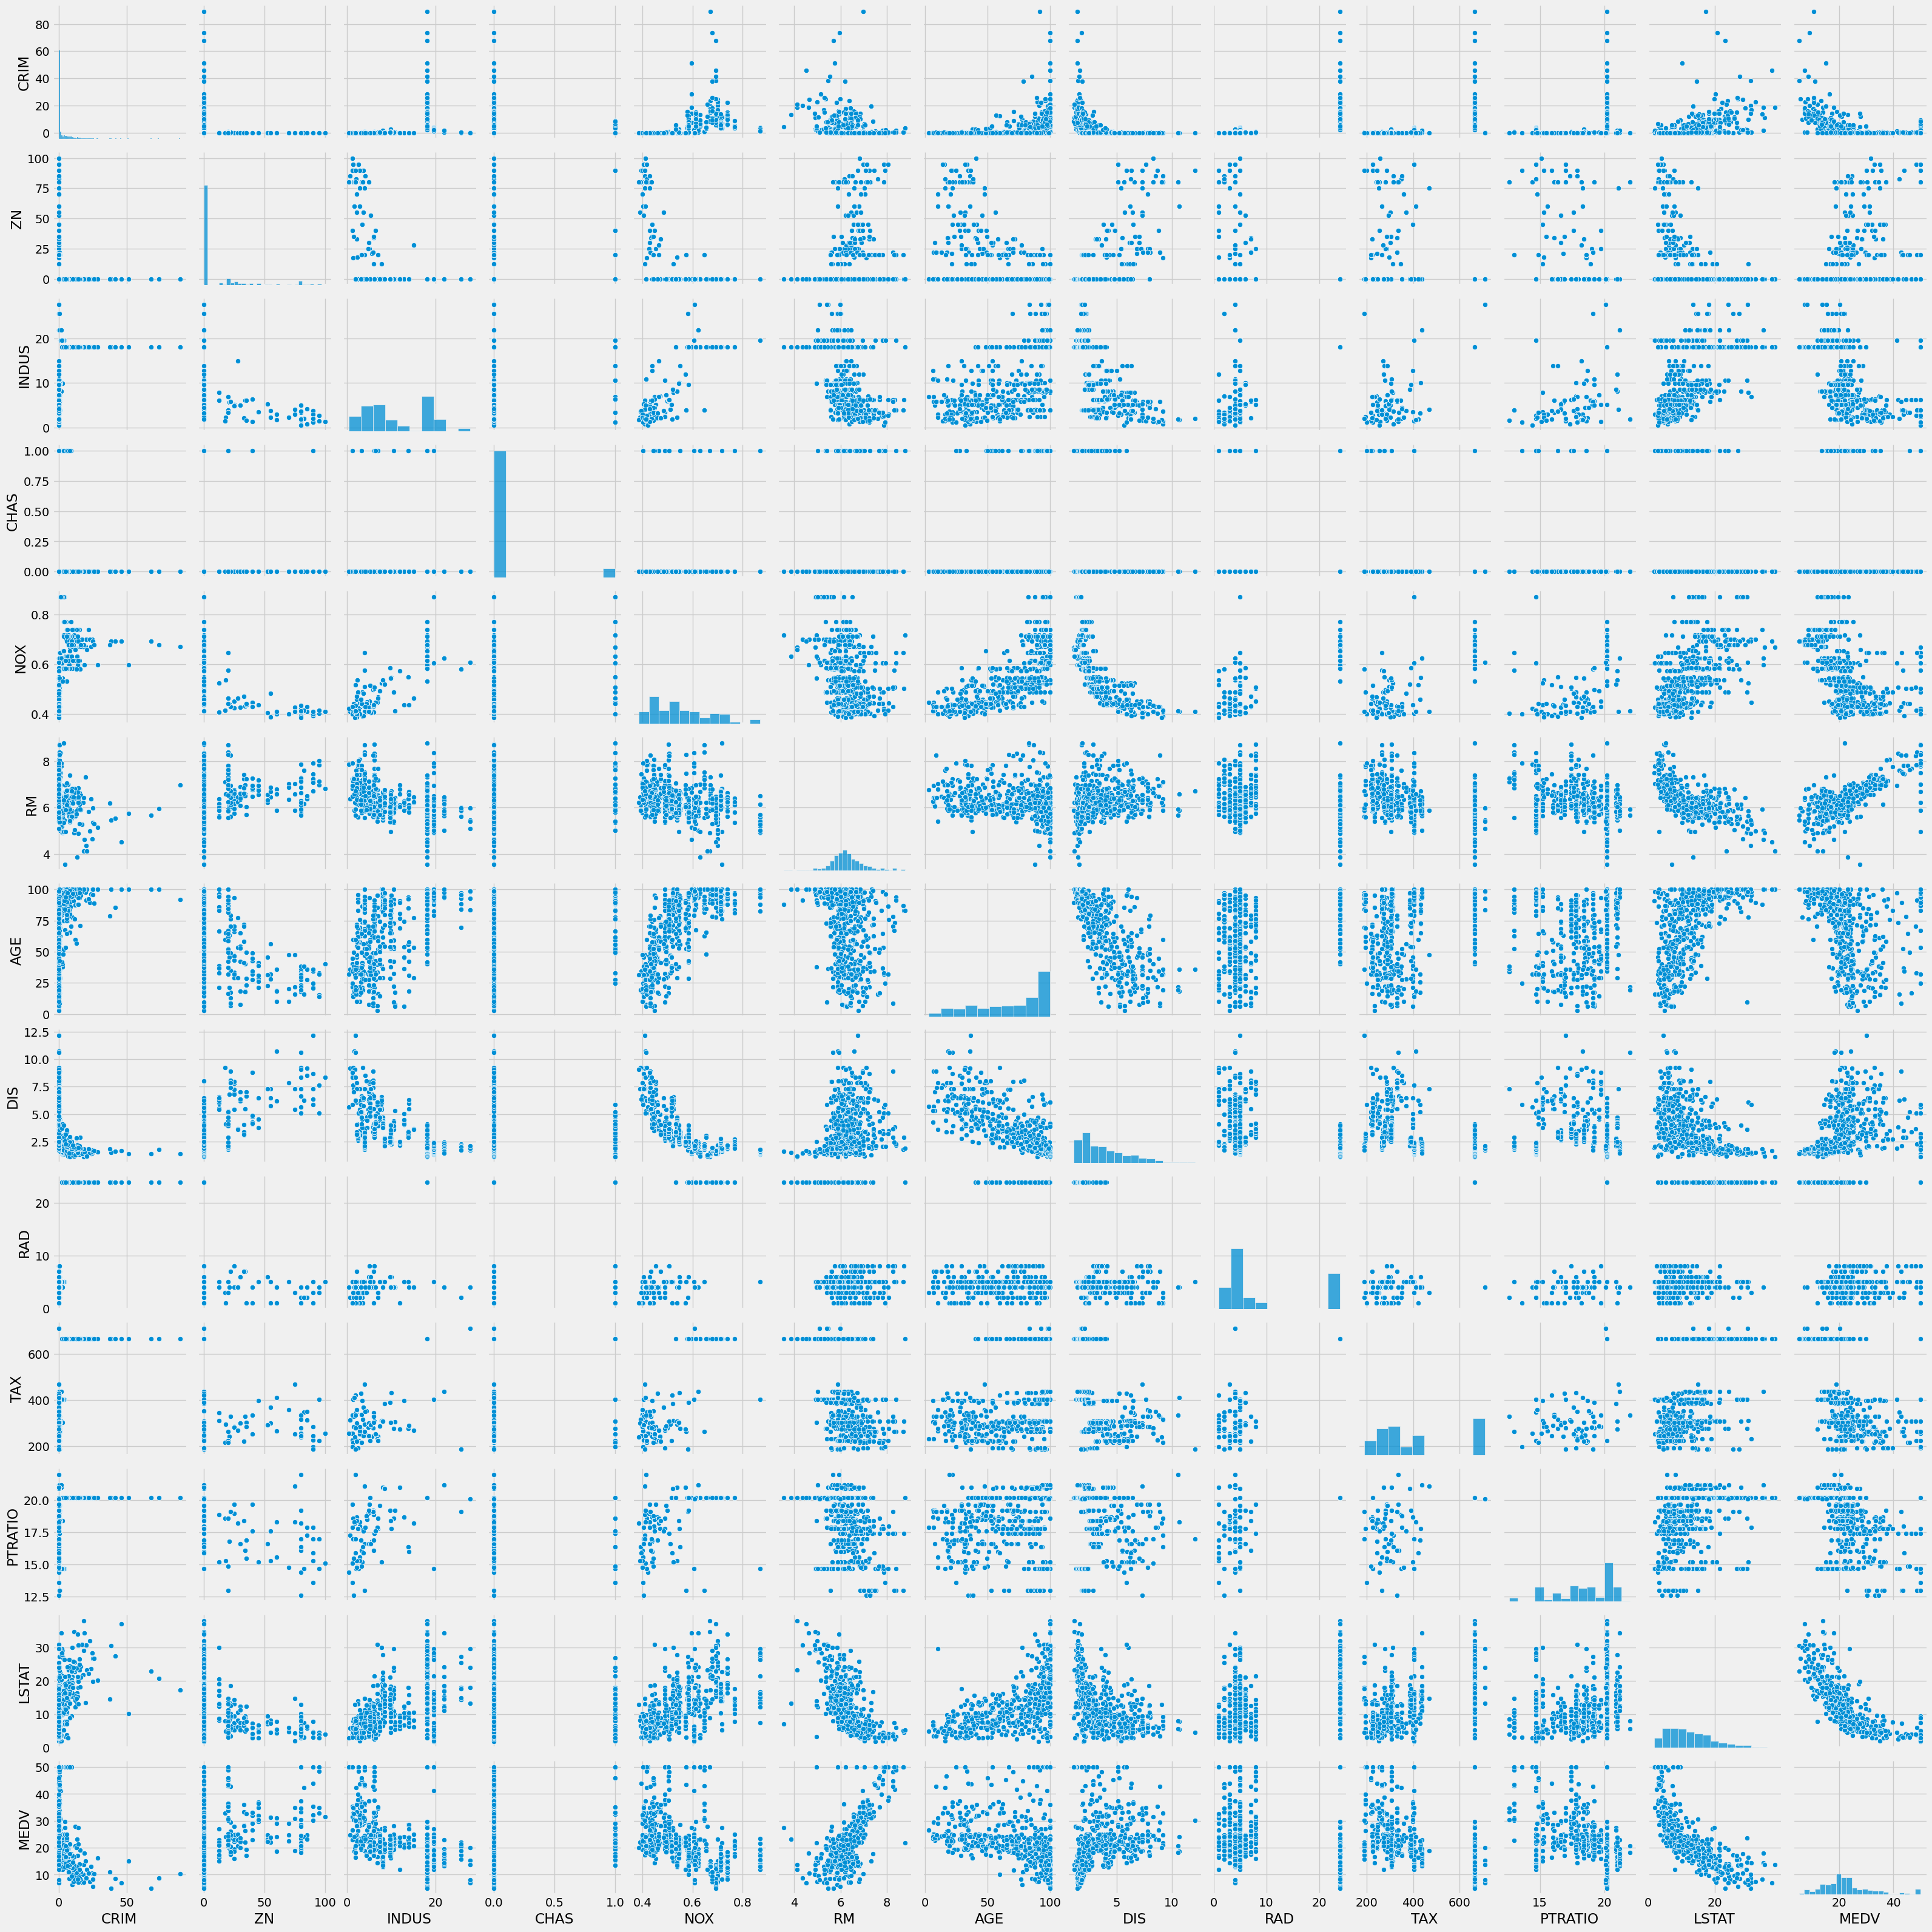

In [ ]:
# Pairplot of different features describing the relationship between different pairs
sns.pairplot(data)

In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [ ]:
# Separating Input Features and Target Feature
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [ ]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [ ]:
# Train Test Split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,shuffle=True,random_state=21)

In [ ]:
# Scaling the input features
x_scale_object = MinMaxScaler((0,1))
x_train_scaled = x_scale_object.fit_transform(x_train)

In [ ]:
x_train_scaled.shape

(379, 12)

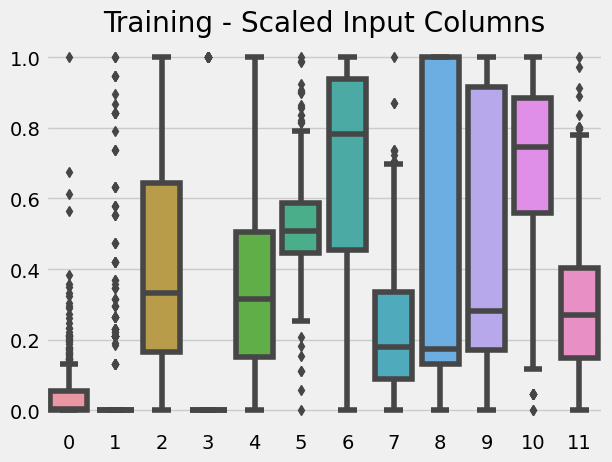

In [ ]:
# Boxplot of scaled features
sns.boxplot(x_train_scaled)
plt.title("Training - Scaled Input Columns")
plt.show()

In [ ]:
# scaling testing data
x_test_scaled = x_scale_object.transform(x_test)

# Simple Neural Network

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                156       
                                                                 
 dense_1 (Dense)             (None, 24)                312       
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 493
Trainable params: 493
Non-trainable params: 0
_________________________________________________________________


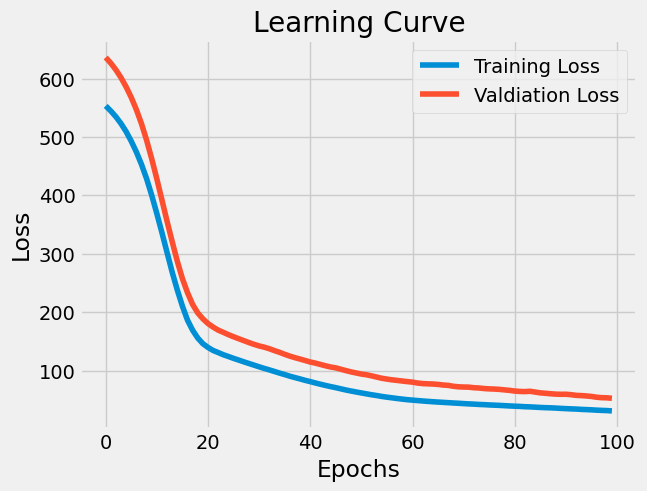

4/4 [==============================] - 0s 2ms/step


In [ ]:
### Defining the Model Architecture
# Input shape of the features
model = Sequential()
model.add(Input(shape=(12,)))

# Hidden Layer 1 with units, activation and regularization
model.add(Dense(units=12,activation='relu',kernel_regularizer=regularizers.L2(l2=0.01))) #leaky_relu

# Hidden Layer 2 with units, activation and regularization
model.add(Dense(units=24,activation='relu',kernel_regularizer=regularizers.L2(l2=0.01)))

# Output Layer with units, activation and regularization
model.add(Dense(units='1',activation='linear',kernel_regularizer=regularizers.L2(l2=0.01)))

# Defining the Optimizer
optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.001)
# optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=0.001)

# Compiling the model
model.compile(optimizer=optimizer,loss='mse')

model.summary()

history=model.fit(x_train_scaled,y_train,validation_split=0.3,epochs=100,verbose=0)

# Plotting the learning curve

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Learning Curve')
plt.legend(['Training Loss','Valdiation Loss'])
plt.show()


# Predicting on test data

predictions=model.predict(x_test_scaled)

In [ ]:
# evaluate the model
model.evaluate(x_test_scaled, y_test, verbose=0)

39.399085998535156

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                156       
                                                                 
 dense_4 (Dense)             (None, 24)                312       
                                                                 
 dense_5 (Dense)             (None, 1)                 25        
                                                                 
Total params: 493
Trainable params: 493
Non-trainable params: 0
_________________________________________________________________


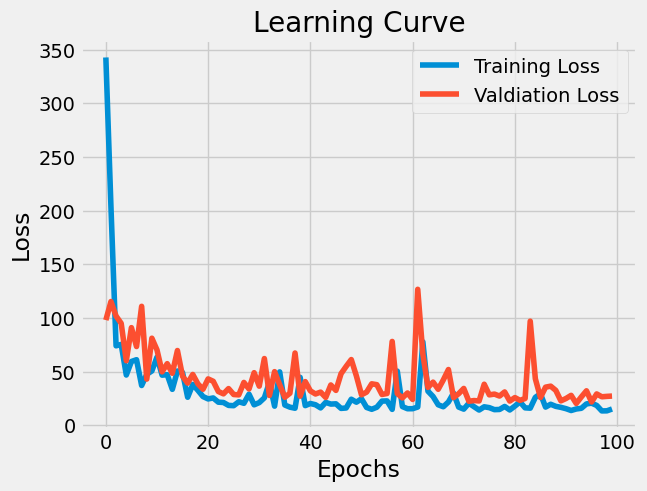

4/4 [==============================] - 0s 3ms/step


In [ ]:
### Defining the Model Architecture - SGD Optimizer
# Input shape of the features
model = Sequential()
model.add(Input(shape=(12,)))

# Hidden Layer 1 with units, activation and regularization
model.add(Dense(units=12,activation='relu',kernel_regularizer=regularizers.L2(l2=0.01))) #leaky_relu

# Hidden Layer 2 with units, activation and regularization
model.add(Dense(units=24,activation='relu',kernel_regularizer=regularizers.L2(l2=0.01)))

# Output Layer with units, activation and regularization
model.add(Dense(units='1',activation='linear',kernel_regularizer=regularizers.L2(l2=0.01)))

# Defining the Optimizer
optimizer=tensorflow.keras.optimizers.experimental.SGD()
# optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=0.001)

# Compiling the model
model.compile(optimizer=optimizer,loss='mse')

model.summary()

history=model.fit(x_train_scaled,y_train,validation_split=0.3,epochs=100,verbose=0)

# Plotting the learning curve

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Learning Curve')
plt.legend(['Training Loss','Valdiation Loss'])
plt.show()


# Predicting on test data

predictions=model.predict(x_test_scaled)

In [ ]:
# evaluate the model
model.evaluate(x_test_scaled, y_test, verbose=0)

20.078615188598633

# Model with Dropout Layers

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                156       
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                                                 
 dense_7 (Dense)             (None, 24)                312       
                                                                 
 dropout_1 (Dropout)         (None, 24)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 25        
                                                                 
Total params: 493
Trainable params: 493
Non-trainable params: 0
_________________________________________________________________


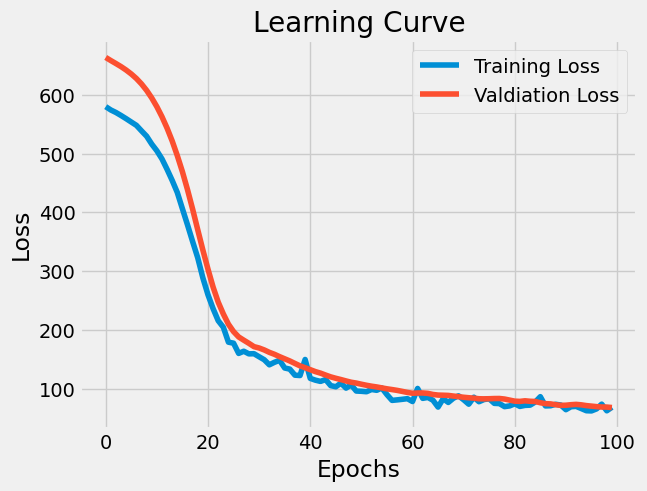

4/4 [==============================] - 0s 2ms/step


In [ ]:
### Defining the Model Architecture
# Input shape of the features
model2 = Sequential()
model2.add(Input(shape=(12,)))

# Hidden Layer 1 with units, activation and regularization
model2.add(Dense(units=12,activation='relu',kernel_regularizer=regularizers.L2(l2=0.01)))

# Dropout Layer
model2.add(Dropout(0.2))

# Hidden Layer 2 with units, activation and regularization
model2.add(Dense(units=24,activation='relu',kernel_regularizer=regularizers.L2(l2=0.01)))

# Dropout Layer
model2.add(Dropout(0.2))

# Output Layer with units, activation and regularization
model2.add(Dense(units='1',activation='linear',kernel_regularizer=regularizers.L2(l2=0.01)))

# Defining the Optimizer
optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.001)

# Compiling the model
model2.compile(optimizer=optimizer,loss='mse')

model2.summary()

history2=model2.fit(x_train_scaled,y_train,validation_split=0.3,epochs=100,verbose=0)

# # Plotting the learning curve

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Learning Curve')
plt.legend(['Training Loss','Valdiation Loss'])
plt.show()

# Predicting on test data

predictions2=model2.predict(x_test_scaled)

In [ ]:
# evaluate the model
model2.evaluate(x_test_scaled, y_test, verbose=0)

51.629669189453125

# Model with Dropout and BatchNormalization

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 12)                156       
                                                                 
 batch_normalization (BatchN  (None, 12)               48        
 ormalization)                                                   
                                                                 
 dropout_2 (Dropout)         (None, 12)                0         
                                                                 
 dense_10 (Dense)            (None, 24)                312       
                                                                 
 batch_normalization_1 (Batc  (None, 24)               96        
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 24)               

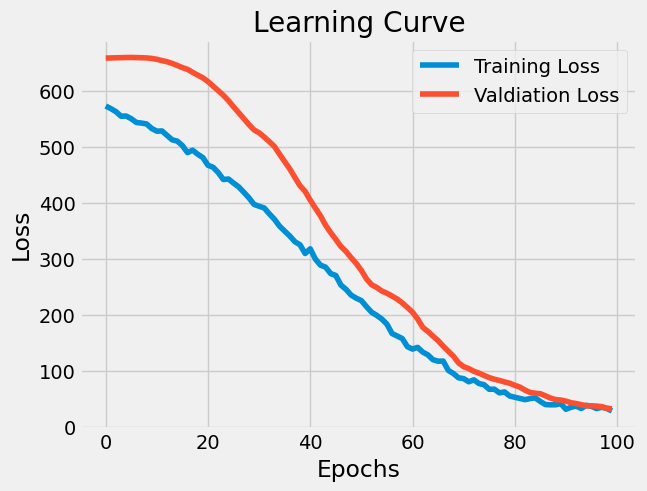

4/4 [==============================] - 0s 2ms/step


In [ ]:
### Defining the Model Architecture
# Input shape of the features
model3 = Sequential()
model3.add(Input(shape=(12,)))

# Hidden Layer 1 with units, activation and regularization
model3.add(Dense(units=12,activation='relu',kernel_regularizer=regularizers.L2(l2=0.01)))

# Batchnorm
model3.add(BatchNormalization(momentum=0.99,epsilon=0.001))

# Dropout Layer
model3.add(Dropout(0.2))

# Hidden Layer 2 with units, activation and regularization
model3.add(Dense(units=24,activation='relu',kernel_regularizer=regularizers.L2(l2=0.01)))

# Batchnorm
model3.add(BatchNormalization(momentum=0.99,epsilon=0.001))

# Dropout Layer
model3.add(Dropout(0.2))

# Output Layer with units, activation and regularization
model3.add(Dense(units='1',activation='linear',kernel_regularizer=regularizers.L2(l2=0.01)))

# Defining the Optimizer
optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.001)

# Compiling the model
model3.compile(optimizer=optimizer,loss='mse')

model3.summary()

history3=model3.fit(x_train_scaled,y_train,validation_split=0.3,epochs=100,verbose=0)

# Plotting the learning curve

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title('Learning Curve')
plt.legend(['Training Loss','Valdiation Loss'])
plt.show()

# Predicting on test data

predictions3=model3.predict(x_test_scaled)

In [ ]:
# evaluate the model
model3.evaluate(x_test_scaled, y_test, verbose=0)

25.52581024169922

## Compare with a gradient boosted tree model. What do you notice? What can we potentially hypotheize in this case?

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
xgb_model = XGBRegressor(n_estimators=25, max_depth=3, learning_rate=0.1, eval_metric=mean_squared_error, early_stopping_rounds =5)


In [ ]:
xgb_model.fit(x_train_scaled, y_train,
            eval_set=[(x_train_scaled, y_train), (x_test_scaled, y_test)])

[0]	validation_0-rmse:21.80379	validation_0-mean_squared_error:475.40546	validation_1-rmse:20.95151	validation_1-mean_squared_error:438.96588
[1]	validation_0-rmse:19.74947	validation_0-mean_squared_error:390.04156	validation_1-rmse:18.96018	validation_1-mean_squared_error:359.48846
[2]	validation_0-rmse:17.90513	validation_0-mean_squared_error:320.59372	validation_1-rmse:17.20914	validation_1-mean_squared_error:296.15448
[3]	validation_0-rmse:16.23650	validation_0-mean_squared_error:263.62390	validation_1-rmse:15.60593	validation_1-mean_squared_error:243.54501
[4]	validation_0-rmse:14.74438	validation_0-mean_squared_error:217.39668	validation_1-rmse:14.19469	validation_1-mean_squared_error:201.48912
[5]	validation_0-rmse:13.39837	validation_0-mean_squared_error:179.51640	validation_1-rmse:12.91420	validation_1-mean_squared_error:166.77663
[6]	validation_0-rmse:12.19284	validation_0-mean_squared_error:148.66525	validation_1-rmse:11.75523	validation_1-mean_squared_error:138.18538
[7]	va

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=5,
             enable_categorical=False,
             eval_metric=<function mean_squared_error at 0x7d5189036680>,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=25, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None, ...)

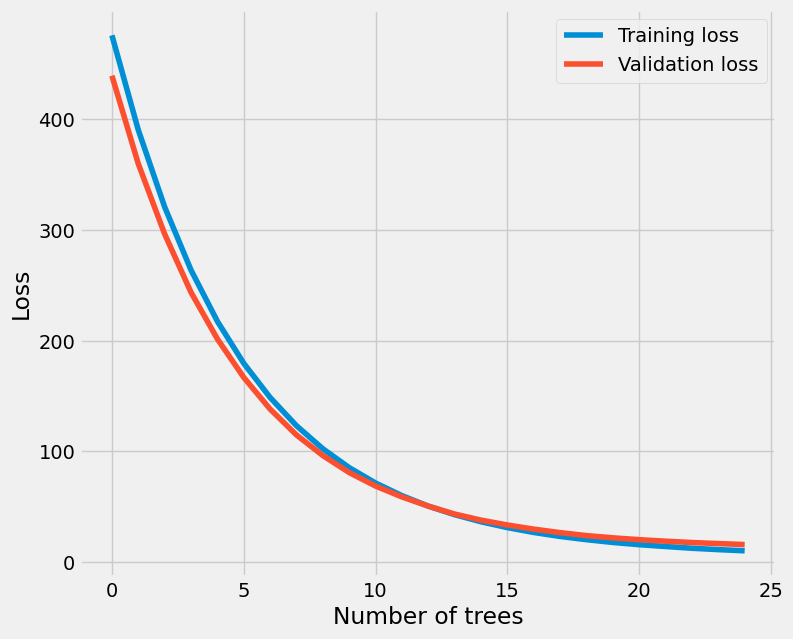

In [ ]:
results = xgb_model.evals_result()

plt.figure(figsize=(8,7))
plt.plot(results["validation_0"]["mean_squared_error"], label="Training loss")
plt.plot(results["validation_1"]["mean_squared_error"], label="Validation loss")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

In [ ]:
y_pred_train = xgb_model.predict(x_train_scaled)

y_pred_test = xgb_model.predict(x_test_scaled)

print("Training MSE: {}".format(mean_squared_error(y_train, y_pred_train)))

print()

print("Test MSE: {}".format(mean_squared_error(y_test, y_pred_test)))

Training MSE: 10.34070215207756

Test MSE: 15.971041972686436
